In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import pickle
from matplotlib import cm
from datetime import datetime

In [8]:
# These commands choose fonts that are editable in svg format
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# colors
dblue = '#1f77b4'
red3 = ['#fee0d2','#fc9272','#de2d26']
# oranges from ColorBrewer https://colorbrewer2.org/#type=sequential&scheme=PuBu&n=5
cols=['#feedde','#fdbe85','#fd8d3c','#e6550d','#a63603']
blue5=['#f1eef6','#bdc9e1','#bdc9e1','#2b8cbe','#045a8d']
green5=['#edf8e9','#bae4b3','#74c476','#31a354','#006d2c']
purple5 = ['#f2f0f7','#cbc9e2','#9e9ac8','#756bb1','#54278f']
ored3 = ['#fee8c8','#fdbb84','#e34a33']

# This is the colormap made in SurferClr2Cmap.ipynb from NorthCore_ElevationShader_v2.clr
fp = open('cmap_ncb.pkl', 'rb')
cmap_ncb = pickle.load(fp)
fp.close()

# This makes NaN gray
tcmap=cmap_ncb
tcmap.set_bad(color='darkgray')

# tcmapw=cmap_ncb
# tcmapw.set_bad(color='white')

# This is the difference color map
dcmap = cm.seismic.copy()
dcmap.set_bad(color='darkgray')

# This is the difference color map
# dcmapw = cm.seismic.copy()
# dcmapw.set_bad(color='white')

ygbmap = cm.YlGnBu_r.copy()
ygbmap.set_bad(color='darkgray')

prmap = cm.PuRd.copy()
prmap.set_bad(color='darkgray')

In [3]:
fig_dir = '/vortexfs1/home/csherwood/proj/dorian/'

In [4]:
url = '/vortexfs1/home/csherwood/proj/dorian/NCoreBanks_sub9_pre_post_veg.nc'
ds_obs = xr.open_dataset(url)
ds_obs

<xarray.Dataset>
Dimensions:           (one: 1, bath: 1, eta_rho: 1017, xi_rho: 1317,
                       eta_psi: 1016, xi_psi: 1316, eta_u: 1017, xi_u: 1316,
                       eta_v: 1016, xi_v: 1317)
Dimensions without coordinates: one, bath, eta_rho, xi_rho, eta_psi, xi_psi,
                                eta_u, xi_u, eta_v, xi_v
Data variables: (12/37)
    xl                (one) float64 ...
    el                (one) float64 ...
    JPRJ              |S2 ...
    spherical         (one) |S1 ...
    depthmin          (one) int16 ...
    depthmax          (one) int16 ...
    ...                ...
    mask_v            (eta_v, xi_v) float64 ...
    mask_psi          (eta_psi, xi_psi) float64 ...
    angle             (eta_rho, xi_rho) float64 ...
    canopy_height     (eta_rho, xi_rho) float64 ...
    pre_Dorian_elev   (eta_rho, xi_rho) float64 ...
    post_Dorian_elev  (eta_rho, xi_rho) float64 ...
Attributes:
    type:     ROMS GRID file
    gridid:   theGridTitle
    history:  Created by create_roms_netcdf_grid_file, on 02-Sep-2021 12:34:2...
    title:    ROMS Application

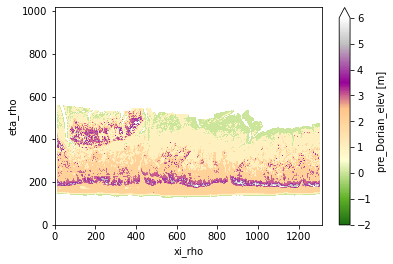

In [5]:
ds_obs.pre_Dorian_elev.plot(cmap=tcmap,vmin=-2,vmax=6)

In [6]:
h_pre = ds_obs.pre_Dorian_elev
h_pst = ds_obs.post_Dorian_elev
x = ds_obs.xi_rho
y = ds_obs.eta_rho

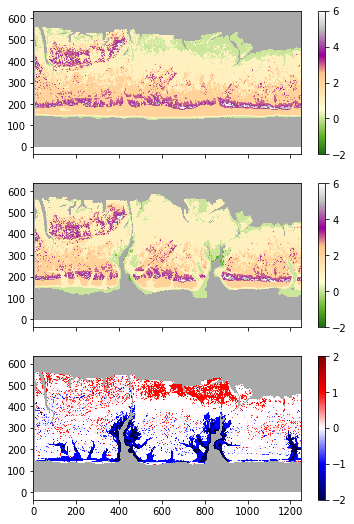

In [9]:
fig, ax = plt.subplots(3,1, figsize=(6,9))
map0 = ax[0].pcolormesh(x,y,h_pre, cmap=tcmap, vmin = -2., vmax = 6)
ax[0].axis('equal')
ax[0].set_ylim([0,600])
ax[0].set_xlim([0,1250])
fig.colorbar(map0, ax=ax[0])
#ax[0].title.set_text('Pre-Dorian SfM topography (m)')
ax[0].set_xticklabels([])

map1 = ax[1].pcolormesh(x,y,h_pst, cmap=tcmap, vmin = -2., vmax = 6)
ax[1].axis('equal')
ax[1].set_ylim([0,600])
ax[1].set_xlim([0,1250])
fig.colorbar(map1, ax=ax[1])
#ax[1].title.set_text('Post-Dorian SfM topography (m)')
ax[1].set_xticklabels([])

map2 = ax[2].pcolormesh(x,y,(h_pst-h_pre), cmap=dcmap, vmin=-2, vmax=2 )
ax[2].axis('equal')
ax[2].set_ylim([0,600])
ax[2].set_xlim([0,1250])
fig.colorbar(map2, ax=ax[2])
# _ = ax[2].title.set_text('Post minus Pre topography diff. (m)')
plt.savefig(fig_dir+'obs_pre_post_diff.png',dpi=200)